In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\HT\\Desktop\\Coderschool\\Mydoing\\Data Science'

In [3]:
path = os.path.join(os.getcwd(), 'dataset','dataset')
path

'C:\\Users\\HT\\Desktop\\Coderschool\\Mydoing\\Data Science\\dataset\\dataset'

In [4]:
os.listdir(os.path.join(os.getcwd(), 'dataset','dataset'))

['310_23498_bundle_archive.zip',
 'application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'data-science-bowl-2019.zip',
 'home-credit-default-risk.zip',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'kaggle-survey-2019.zip',
 'labels.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv',
 'test.zip',
 'train.zip',
 'tweet-sentiment-extraction.zip']

In [5]:
train = pd.read_csv('dataset/dataset/application_train.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test = pd.read_csv('dataset/dataset/application_test.csv')
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.shape, test.shape

((307511, 122), (48744, 121))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [11]:
test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

### EDA
Exploratory Data Analysis (EDA) is an open-ended process where we calculate Statistics
- Make figures to find trends, anomalies, patterns, relationships
- Goal of EDA is to learn what our data can tell us
- it generally starts out with a high level overview, then
- narrows into specific areas as we find intriguing areas of the data.

- they can be used to inform our modeling choices, 
- helping us decide which features to use


In [12]:
train['TARGET'].dtypes

dtype('int64')

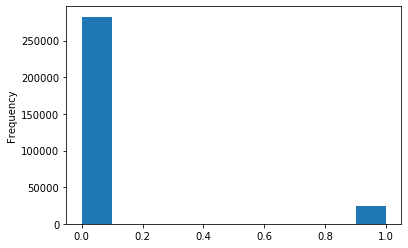

In [13]:
train['TARGET'].plot.hist()

In [14]:
train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [15]:
train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [16]:
train.notnull().sum()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64

In [17]:
# FUnction to calculate missing values by columns
def missing_values_table(df):
    #total missing values
    mis_val = df.isnull().sum()
    # percentage of missing values every columns
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    #make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    #rename the columns 
    mis_val_table_new = mis_val_table.rename(columns = {0: 'Missing Values',
                                                        1: '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_new = mis_val_table_new[mis_val_table_new.iloc[:, 1] != 0].sort_values('% of Total Values',
                                                                                         ascending=False).round(1)
    
    print(df.shape[1])
    print(mis_val_table_new.shape[0])
    return mis_val_table_new

    

In [18]:
# missing values statistics
missing_values = missing_values_table(train)
missing_values.head(20)

122
67


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [19]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [20]:
# train.select_dtypes('object').value_counts()

In [21]:
train.dtypes.value_counts()


float64    65
int64      41
object     16
dtype: int64

In [22]:
type(train.dtypes)

pandas.core.series.Series

In [23]:
train.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
OCCUPATION_TYPE               211120 non-null object
WEEKDAY_APPR_PROCESS_START    307511 non-null object
ORGANIZATION_TYPE             307511 non-null object
FONDKAPREMONT_MODE            97216 non-null object
HOUSETYPE_MODE                153214 non-null object
WALLSMATERIAL_MODE            151170 non-null object
EMERGENCYSTATE_MODE           161756 non-null object
dtypes: object(16)
memory usage: 37.5+ MB


In [24]:
# Number of unique
train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [25]:
train['FONDKAPREMONT_MODE'].unique()

array(['reg oper account', nan, 'org spec account',
       'reg oper spec account', 'not specified'], dtype=object)

In [26]:
# Encoding categorical Variables

# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)
# train.shape. test.shape

In [27]:
train.shape, test.shape

((307511, 246), (48744, 242))

In [28]:
train_labels = train['TARGET']

#Align the training and testing data, 
#keep only columns present in both dataframes

train, test = train.align(test, join='inner', axis=1)



In [29]:
train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [30]:
train.shape, test.shape

((307511, 242), (48744, 242))

In [31]:
train['TARGET'] = train_labels
train.shape

(307511, 243)

In [32]:
#EDA
# Anomalies

In [33]:
(train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [34]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [35]:
type((train['DAYS_EMPLOYED'] > 50000).sum())

numpy.int64

Text(0.5, 0, 'Days Employment')

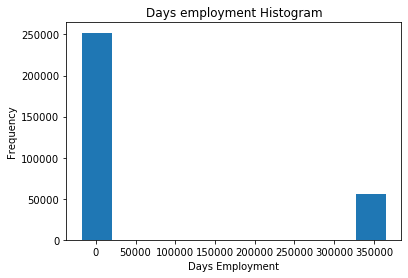

In [36]:
train['DAYS_EMPLOYED'].plot.hist(title='Days employment Histogram')
plt.xlabel('Days Employment')


In [37]:
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]

print(' The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

 The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [38]:
(train['DAYS_EMPLOYED'] == 365243).sum()

55374

Text(0.5, 0, 'Days employment')

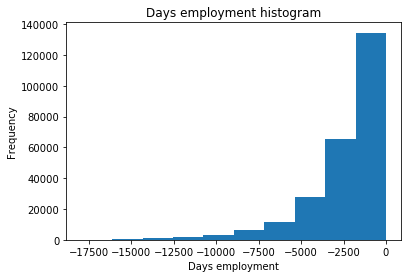

In [39]:
# create an anomalous flag columns
train['DAYS_EMPLOYED_ANOM'] = train['DAYS_EMPLOYED'] == 365243

#replace the anomalous values with nan
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)
train['DAYS_EMPLOYED'].plot.hist(title = 'Days employment histogram')
plt.xlabel('Days employment')


In [40]:
test['DAYS_EMPLOYED_ANOM'] = test['DAYS_EMPLOYED'] == 365243
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)
print('There are %d anomalies in the test data out of %d entires' % (test['DAYS_EMPLOYED_ANOM'].sum(),
                                                                     len(test)))

There are 9274 anomalies in the test data out of 48744 entires


In [41]:
# train.corr()

In [42]:
# Correlation
# one way to understand  the data is by looking for correlatons between the features and the target
correlations = train.corr()['TARGET'].sort_values()

print('Most Positive Correlations: \n', correlations.tail(15))
print('\nMost Negative Correlations: \n', correlations.head(15))



Most Positive Correlations: 
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negat

In [43]:
# DAYS_BIRTH is more correlation with TARGET

train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [44]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
train['DAYS_BIRTH'].corr(train['TARGET'])

-0.07823930830982712

Text(0, 0.5, 'Count')

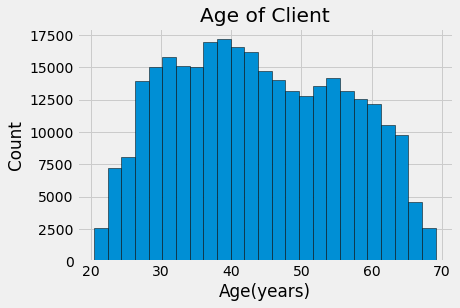

In [45]:
plt.style.use('fivethirtyeight')

plt.hist(train['DAYS_BIRTH'] / 365, edgecolor ='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age(years)')
plt.ylabel('Count')

In [46]:
# train.loc[train['TARGET'] == 0, ['CNT_CHILDREN', 'AMT_CREDIT']]

Text(0.5, 1.0, 'Distribution of ages')

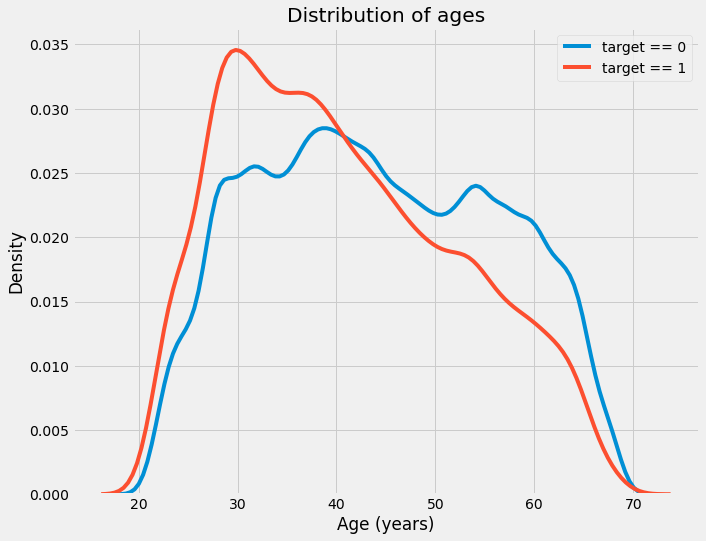

In [47]:
plt.figure(figsize=(10, 8))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='target == 1')

# labeling of plot 
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of ages')



In [48]:
age_data = train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [49]:
# groupby the bin and calculate averages

age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


In [50]:
age_groups.index.astype(str)

Index(['(20.0, 25.0]', '(25.0, 30.0]', '(30.0, 35.0]', '(35.0, 40.0]',
       '(40.0, 45.0]', '(45.0, 50.0]', '(50.0, 55.0]', '(55.0, 60.0]',
       '(60.0, 65.0]', '(65.0, 70.0]'],
      dtype='object', name='YEARS_BINNED')

In [51]:
age_groups.index

CategoricalIndex([(20.0, 25.0], (25.0, 30.0], (30.0, 35.0], (35.0, 40.0],
                  (40.0, 45.0], (45.0, 50.0], (50.0, 55.0], (55.0, 60.0],
                  (60.0, 65.0], (65.0, 70.0]],
                 categories=[(20.0, 25.0], (25.0, 30.0], (30.0, 35.0], (35.0, 40.0], (40.0, 45.0], (45.0, 50.0], (50.0, 55.0], (55.0, 60.0], ...], ordered=True, name='YEARS_BINNED', dtype='category')

Text(0.5, 1.0, 'Failure to repay by age group')

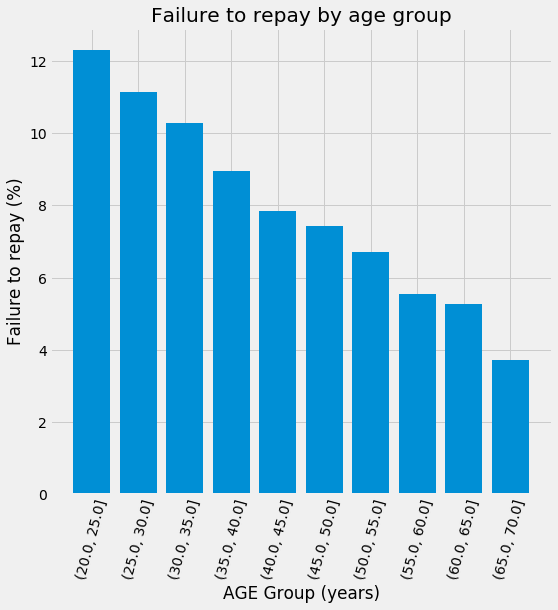

In [52]:
plt.figure(figsize=(8, 8))
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

plt.xticks(rotation=75)
plt.xlabel('AGE Group (years)')
plt.ylabel('Failure to repay (%)')
plt.title('Failure to repay by age group')

In [53]:
# Extract the ext_source variables and show correlations

ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                  'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1, 'Correlation Heatmap')

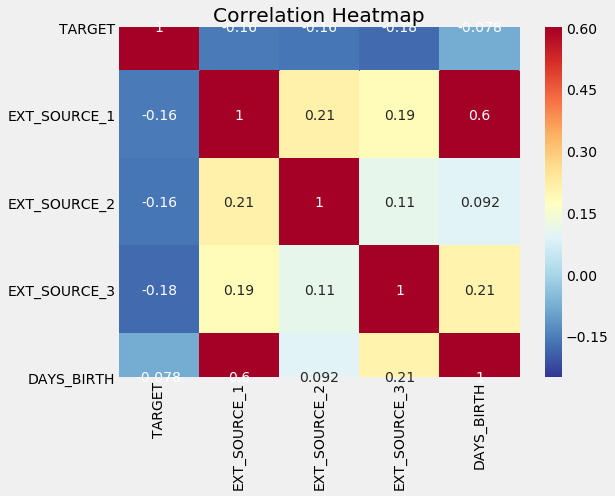

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin= -0.25, 
            annot=True, vmax=0.6)

plt.title('Correlation Heatmap')

In [55]:
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                            'EXT_SOURCE_3']):
    print(i, source)

0 EXT_SOURCE_1
1 EXT_SOURCE_2
2 EXT_SOURCE_3


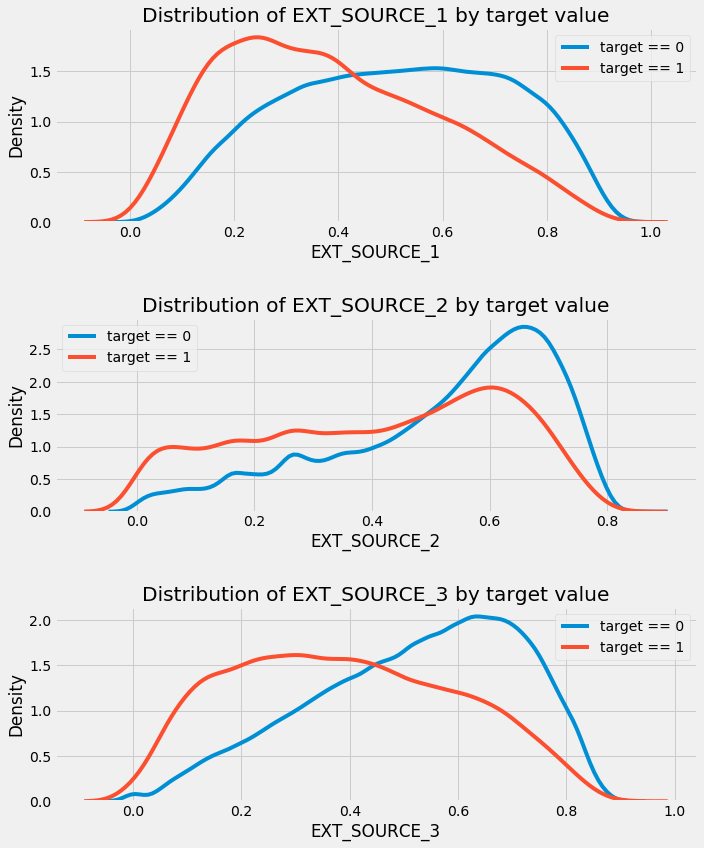

In [56]:
plt.figure(figsize=(10, 12))
# iterate through the sources

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                            'EXT_SOURCE_3']):
    # create a new subplot for each source
    plt.subplot(3, 1, i+1)
    #plot repaid loans
    sns.kdeplot(train.loc[train['TARGET'] == 0, source],
                label='target == 0')
    # Plot loans that were not repaid
    sns.kdeplot(train.loc[train['TARGET'] == 1, source],
                label='target == 1')
    # Label the plots
    plt.title('Distribution of %s by target value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    
plt.tight_layout(h_pad=2.5)
    

In [57]:
# copy the data for ploting 
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()

# add in the age of the client in years

plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']


In [58]:
plot_data

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH
0,1,0.083037,0.262949,0.139376,25.920548
1,0,0.311267,0.622246,NaN,45.931507
2,0,NaN,0.555912,0.729567,52.180822
3,0,NaN,0.650442,NaN,52.068493
4,0,NaN,0.322738,NaN,54.608219
...,...,...,...,...,...
307506,0,0.145570,0.681632,NaN,25.553425
307507,0,NaN,0.115992,NaN,56.917808
307508,0,0.744026,0.535722,0.218859,41.002740
307509,1,NaN,0.514163,0.661024,32.769863


In [59]:
plot_data = plot_data.dropna().loc[:100000, :]
plot_data

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH
0,1,0.083037,0.262949,0.139376,25.920548
6,0,0.774761,0.724000,0.492060,37.747945
8,0,0.587334,0.205747,0.751724,55.065753
10,0,0.319760,0.651862,0.363945,27.936986
11,0,0.722044,0.555183,0.652897,55.936986
...,...,...,...,...,...
99983,0,0.869888,0.764106,0.486653,56.339726
99985,0,0.705669,0.478388,0.755740,51.389041
99988,0,0.369034,0.642947,0.654529,29.043836
99990,0,0.578504,0.521654,0.317032,32.687671


In [60]:
# function to calculate correlation coefficient between 2 columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r), xy=(.2, .8), xycoords = ax.transAxes,
                size= 20)

Text(0.5, 1.05, 'Ext Source and Age Feature Pairs Plot')

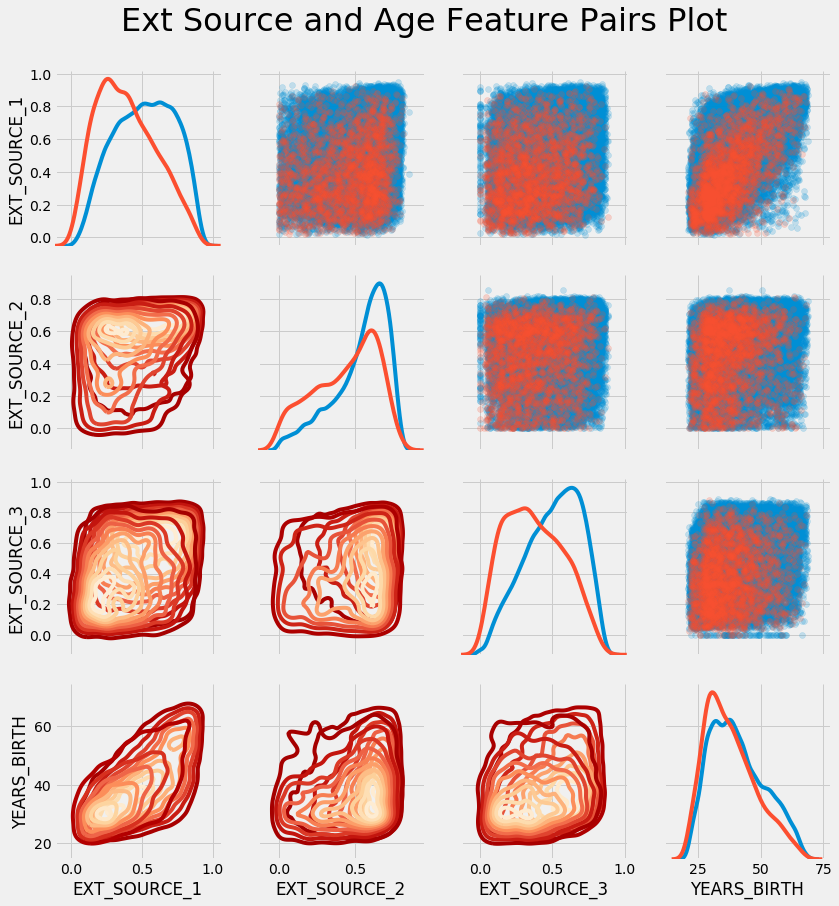

In [62]:
#Create the pairgrid object

grid = sns.PairGrid(data=plot_data, size=3, diag_sharey=False,
                    hue='TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

grid.map_upper(plt.scatter, alpha=0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot

grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Feature Pairs Plot', size=32, y = 1.05)

Feature Engineering
Kaggle competitions are won by feature engineering: those win are those who can create the most useful features out of the data. (This is true for the most part as the winning models, at least for structured data, all tend to be variants on gradient boosting). This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning. This is a great article on the subject). As Andrew Ng is fond of saying: "applied machine learning is basically feature engineering."

While choosing the right model and optimal settings are important, the model can only learn from the data it is given. Making sure this data is as relevant to the task as possible is the job of the data scientist (and maybe some automated tools to help us out).

Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.
We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods:

Polynomial features
Domain knowledge features

In [63]:
# Make a new dataframe for polynomial features
poly_features = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                       'DAYS_BIRTH', 'TARGET']]
poly_features_test = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                           'EXT_SOURCE_3', 'DAYS_BIRTH']]


In [64]:
#imputer for handling  missing values
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns=['TARGET'])


# imputer fit and take vocabulary from poly_features dataframe
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)


from sklearn.preprocessing import PolynomialFeatures

# Create polynomialfeatures with specified degree

poly_transformer = PolynomialFeatures(degree=3)


#train polynomial features

poly_transformer.fit(poly_features)

#transform the features

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)


print('Polynomial Features shape:', poly_features.shape)

    

Polynomial Features shape: (307511, 35)


In [65]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                     'EXT_SOURCE_3', 'DAYS_BIRTH', 
                                                     'TARGET'])[:15]


['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [66]:
# Create a dataframe of the features

poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 
                                                                           'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# add in the target 
poly_features['TARGET'] = poly_target


In [67]:
poly_features

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET
0,1.0,0.083037,0.262949,0.139376,9461.0,0.006895,0.021834,0.011573,785.612748,0.069142,...,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11,1
1,1.0,0.311267,0.622246,0.535276,16765.0,0.096887,0.193685,0.166614,5218.396475,0.387190,...,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12,0
2,1.0,0.505998,0.555912,0.729567,19046.0,0.256034,0.281290,0.369159,9637.236584,0.309038,...,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12,0
3,1.0,0.505998,0.650442,0.535276,19005.0,0.256034,0.329122,0.270849,9616.490669,0.423074,...,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12,0
4,1.0,0.505998,0.322738,0.535276,19932.0,0.256034,0.163305,0.270849,10085.550751,0.104160,...,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.145570,0.681632,0.535276,9327.0,0.021191,0.099226,0.077920,1357.735625,0.464623,...,0.248701,4333.535804,0.195302,3403.064320,5.929720e+07,0.153368,2672.378236,4.656525e+07,8.113830e+11,0
307507,1.0,0.505998,0.115992,0.535276,20775.0,0.256034,0.058692,0.270849,10512.107006,0.013454,...,0.007202,279.510194,0.033234,1289.874083,5.006225e+07,0.153368,5952.466801,2.310256e+08,8.966503e+12,0
307508,1.0,0.744026,0.535722,0.218859,14966.0,0.553575,0.398591,0.162837,11135.099105,0.286998,...,0.062812,4295.209004,0.025661,1754.727146,1.199916e+08,0.010483,716.860892,4.902031e+07,3.352102e+12,0
307509,1.0,0.505998,0.514163,0.661024,11961.0,0.256034,0.260165,0.334477,6052.241247,0.264363,...,0.174750,3162.050698,0.224665,4065.229651,7.355897e+07,0.288836,5226.384299,9.456968e+07,1.711207e+12,1


In [68]:
poly_corrs = poly_features.corr()['TARGET'].sort_values()

poly_corrs.head(5), poly_corrs.tail(5)

(EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
 EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
 EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
 EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
 EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
 Name: TARGET, dtype: float64, DAYS_BIRTH     -0.078239
 DAYS_BIRTH^2   -0.076672
 DAYS_BIRTH^3   -0.074273
 TARGET          1.000000
 1                    NaN
 Name: TARGET, dtype: float64)

In [69]:
poly_corrs.tail(5)

DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64

In [70]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [71]:
poly_features_test

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,...,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3
0,1.0,0.752614,0.789654,0.159520,-19241.0,0.566429,0.594305,0.120057,-14481.055414,0.623554,...,0.492392,0.099469,-11997.802403,0.020094,-2423.698322,2.923427e+08,0.004059,-489.615795,5.905670e+07,-7.123328e+12
1,1.0,0.564990,0.291656,0.432962,-18064.0,0.319214,0.164783,0.244619,-10205.983005,0.085063,...,0.024809,0.036829,-1536.577117,0.054673,-2281.043619,9.516956e+07,0.081161,-3386.201665,1.412789e+08,-5.894429e+12
2,1.0,0.505998,0.699787,0.610991,-20038.0,0.256034,0.354091,0.309160,-10139.186531,0.489702,...,0.342687,0.299203,-9812.640816,0.261238,-8567.521115,2.809794e+08,0.228089,-7480.393855,2.453261e+08,-8.045687e+12
3,1.0,0.525734,0.509677,0.612704,-13976.0,0.276396,0.267955,0.322119,-7347.658072,0.259771,...,0.132399,0.159163,-3630.555667,0.191336,-4364.443591,9.955450e+07,0.230013,-5246.681115,1.196786e+08,-2.729912e+12
4,1.0,0.202145,0.425687,0.535276,-13040.0,0.040863,0.086051,0.108203,-2635.970697,0.181210,...,0.077139,0.096997,-2362.974127,0.121968,-2971.298294,7.238455e+07,0.153368,-3736.229463,9.101923e+07,-2.217342e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,1.0,0.505998,0.648575,0.643026,-19970.0,0.256034,0.328178,0.325370,-10104.778672,0.420649,...,0.272823,0.270488,-8400.368742,0.268174,-8328.493414,2.586523e+08,0.265879,-8257.233066,2.564392e+08,-7.964054e+12
48740,1.0,0.505998,0.684596,0.535276,-11186.0,0.256034,0.346404,0.270849,-5660.092851,0.468671,...,0.320850,0.250869,-5242.555692,0.196151,-4099.084854,8.566112e+07,0.153368,-3205.020151,6.697730e+07,-1.399666e+12
48741,1.0,0.733503,0.632770,0.283712,-15922.0,0.538027,0.464139,0.208104,-11678.842724,0.400397,...,0.253359,0.113597,-6375.125880,0.050933,-2858.384957,1.604135e+08,0.022837,-1281.600508,7.192382e+07,-4.036388e+12
48742,1.0,0.373090,0.445701,0.595456,-13968.0,0.139196,0.166287,0.222159,-5211.322249,0.198649,...,0.088538,0.118287,-2774.734348,0.158031,-3707.043157,8.695850e+07,0.211130,-4952.607075,1.161765e+08,-2.725227e+12


In [72]:
train.shape, poly_features.shape

((307511, 244), (307511, 36))

In [73]:
# merge polynomial features into training dataframe

poly_features['SK_ID_CURR'] = train['SK_ID_CURR']
train_poly = train.merge(poly_features, on='SK_ID_CURR', how='left')


#Merge polynomialfeatures into testing dataframe
poly_features_test['SK_ID_CURR'] = test['SK_ID_CURR']
test_poly = test.merge(poly_features_test, on='SK_ID_CURR', how='left')


#Align the dataframes

train_poly, test_poly = train_poly.align(test_poly, join='inner', axis=1)


In [74]:
print( f" Training data with polynomial features shape: {train_poly.shape}")
print(f" Testing  data with polynomial features shape: {test_poly.shape}")

 Training data with polynomial features shape: (307511, 278)
 Testing  data with polynomial features shape: (48744, 278)


In [76]:
train_domain = train.copy()
test_domain = test.copy()


In [77]:
train_domain['CREDIT_INCOME_PERCENT'] = train_domain['AMT_CREDIT'] / train_domain['AMT_INCOME_TOTAL']
train_domain['ANNUITY_INCOME_PERCENT'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_INCOME_TOTAL']
train_domain['CREDIT_TERM'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_CREDIT']
train_domain['DAYS_EMPLOYED_PERCENT'] = train_domain['DAYS_EMPLOYED'] / train_domain['DAYS_BIRTH']

In [78]:
test_domain['CREDIT_INCOME_PERCENT'] = test_domain['AMT_CREDIT'] / test_domain['AMT_INCOME_TOTAL']
test_domain['ANNUITY_INCOME_PERCENT'] = test_domain['AMT_ANNUITY'] / test_domain['AMT_INCOME_TOTAL']
test_domain['CREDIT_TERM'] = test_domain['AMT_ANNUITY'] / test_domain['AMT_CREDIT']
test_domain['DAYS_EMPLOYED_PERCENT'] = test_domain['DAYS_EMPLOYED'] / test_domain['DAYS_BIRTH']

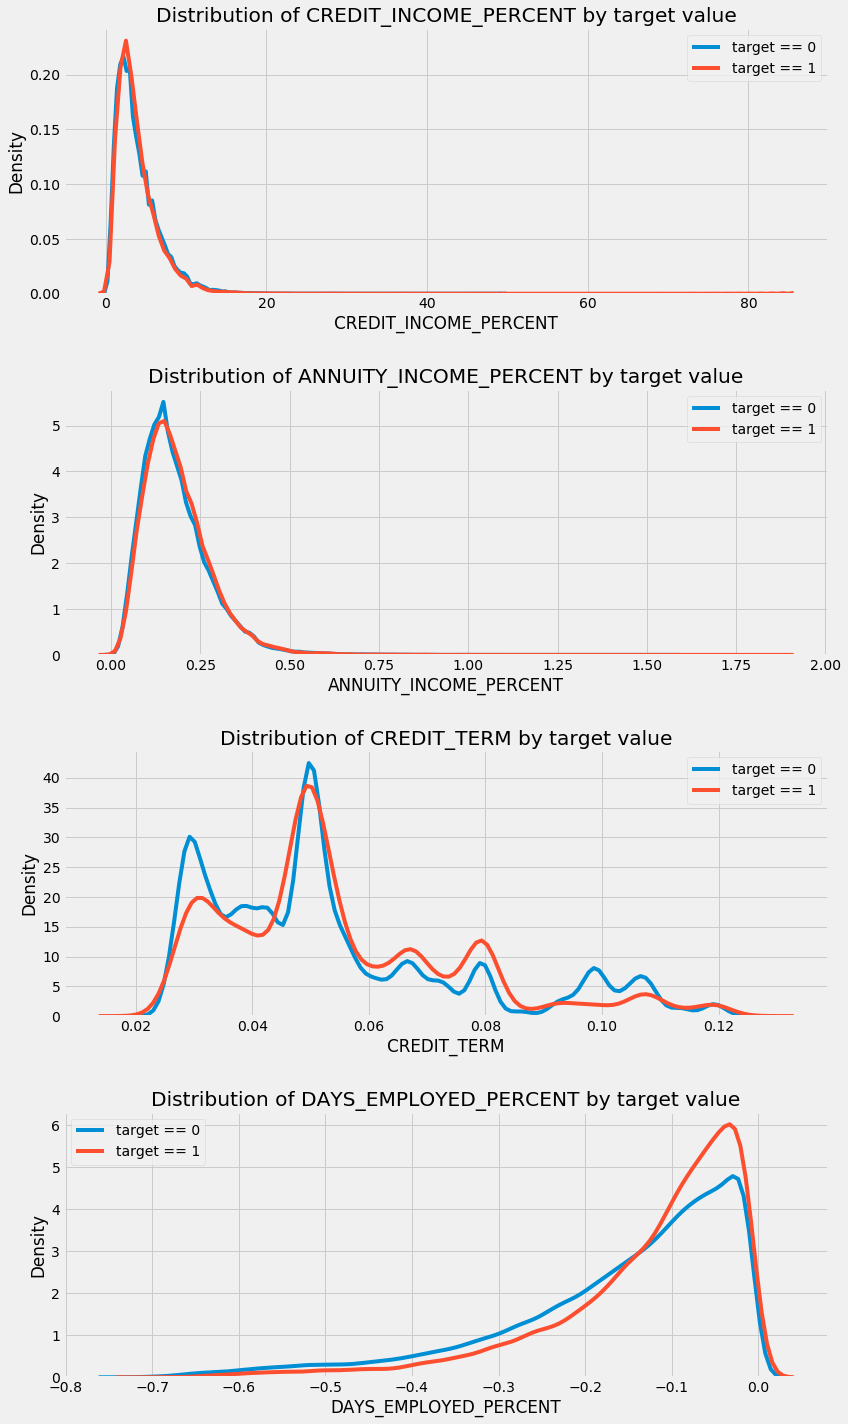

In [79]:
plt.figure(figsize=(12, 20))

#iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 
                             'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):

    # create a new subplot for each source

    plt.subplot(4, 1, i+1)

    # plot repaid loans
    sns.kdeplot(train_domain.loc[train_domain['TARGET'] == 0,
                                feature], label = 'target == 0')

    #plot loans that were not repaid

    sns.kdeplot(train_domain.loc[train_domain['TARGET'] == 1, feature],
                label='target == 1')

    # label the plots
    plt.title('Distribution of %s by target value' % feature)
    plt.xlabel('%s' % feature)
    plt.ylabel('Density')
plt.tight_layout(h_pad = 2.5)



In [81]:
# Build MODEL
from sklearn.preprocessing import MinMaxScaler, Imputer

# drop the target from the training data

if 'TARGET' in train:
    train = train.drop(columns=['TARGET'])
else:
    train = train.copy()
    
# feature names
features = list(train.columns)

test = test.copy()


# Median imputation of missing values

imputer = Imputer(strategy='median')

# Scaler each feature to [0-1]

scaler = MinMaxScaler(feature_range=(0, 1))

# Fit o nthe training data
imputer.fit(train)

#transform both training and testing data

train = imputer.transform(train)
test = imputer.transform(test)

# repeat with the scaler fit and then transform

scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)




In [82]:
train.shape, test.shape

((307511, 243), (48744, 243))

In [83]:
from sklearn.linear_model import LogisticRegression

# Initiate the model with the specified regularization parameter

log_reg = LogisticRegression(C= 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# Make predictions
# make sure to select the second column only

log_reg_pred = log_reg.predict_proba(test)[:, 1]


In [86]:
log_reg_pred

array([0.08785199, 0.16376653, 0.11005081, ..., 0.07436689, 0.0891858 ,
       0.10866985])

In [92]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=50,
                                       verbose=1, n_jobs=-1)
random_forest.fit(train, train_labels)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [95]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 
                                    'importance': feature_importance_values})

# Make prediction on the test data

predictions = random_forest.predict_proba(test)[:, 1]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.0s finished


In [101]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. this can work with any measure of 
    feature importance provided that higher importance is better.
    
    """
    
    # sort features according to importance
    
    df = df.sort_values('importance', ascending=False).reset_index()
    
    # normalize the feature importances to add up to one
    
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    
    # Make a horizontal bar chart of feature importances
    
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    # need to reverse the index to plot most importance on top 
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor='k')
    
    # set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized IMportance')
    plt.title('Feature importance')
    plt.show()
    
    return df
    

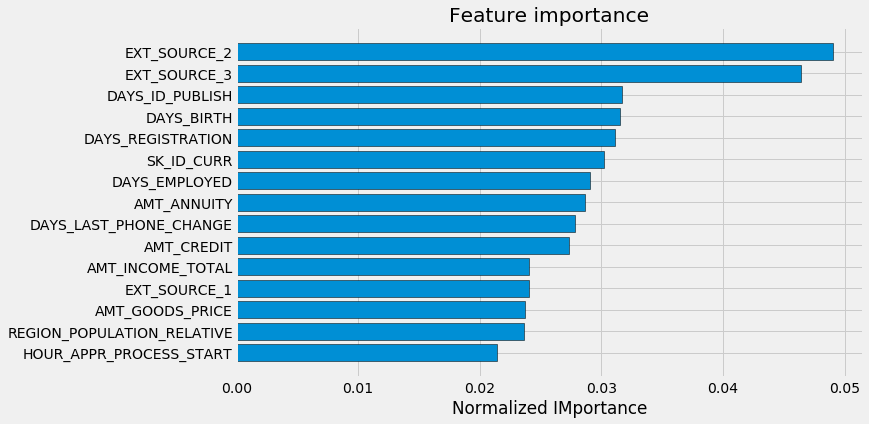

In [102]:
# cal function
feature_importances_sorted = plot_feature_importances(feature_importances)

In [1]:
import os

In [2]:
os.listdir('dataset/dataset')

['310_23498_bundle_archive.zip',
 'application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'data-science-bowl-2019.zip',
 'home-credit-default-risk.zip',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'kaggle-survey-2019.zip',
 'labels.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv',
 'test.zip',
 'train.zip',
 'tweet-sentiment-extraction.zip']

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\HT\\Desktop\\Coderschool\\Mydoing\\Data Science'

In [3]:
train1 = pd.read_csv('dataset/dataset/application_train.csv')
train1.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


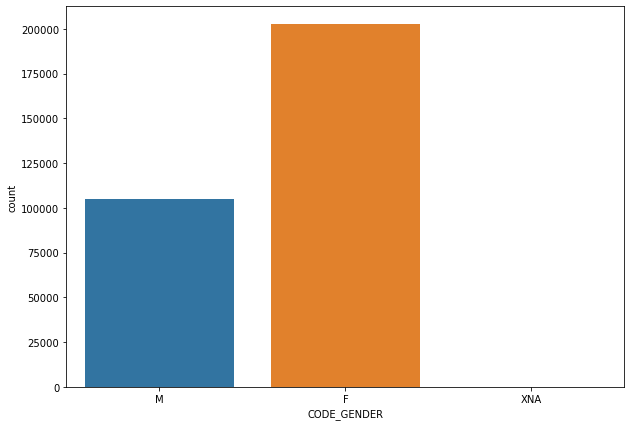

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(x='CODE_GENDER', data=train1)


In [6]:
train1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

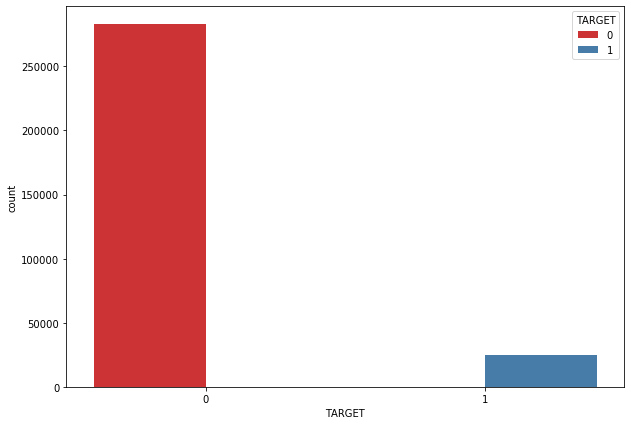

In [7]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x = 'TARGET', data=train1, hue='TARGET', palette='Set1')


In [8]:
train1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

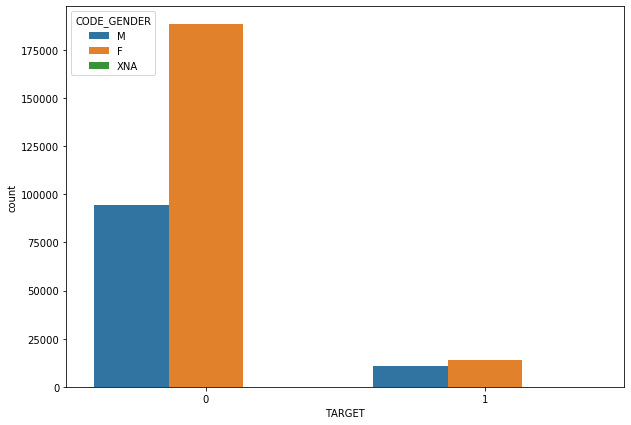

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x='TARGET', hue='CODE_GENDER', data=train1)

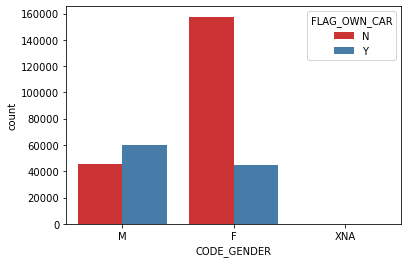

In [12]:
sns.countplot(x='CODE_GENDER', hue='FLAG_OWN_CAR', data=train1, palette='Set1')


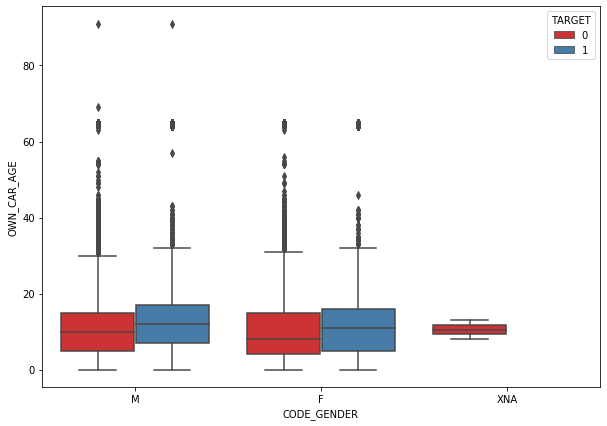

In [14]:
# female own less number of cars
# how old is the client cars

ax = plt.figure(figsize=(10, 7))
sns.boxplot(x='CODE_GENDER', y='OWN_CAR_AGE', hue='TARGET',data=train1,
            palette='Set1')


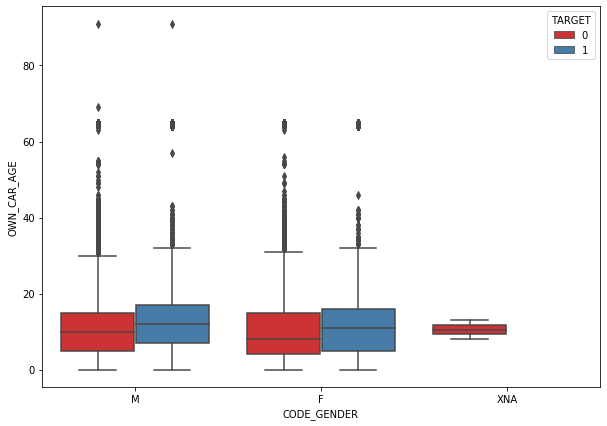

In [15]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x='CODE_GENDER', y='OWN_CAR_AGE', hue='TARGET',data=train1,
            palette='Set1')


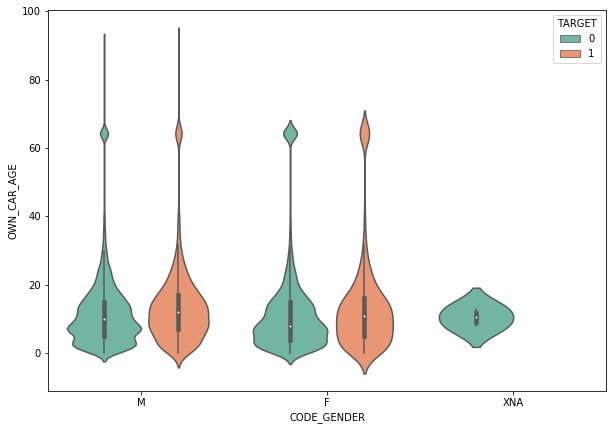

In [16]:
# how is the frequency pf car age
#People with repaying difficulty mostly have older cars
ax = plt.figure(figsize=(10, 7))
sns.violinplot(x='CODE_GENDER', y='OWN_CAR_AGE', hue='TARGET',
              data=train1, palette='Set2')

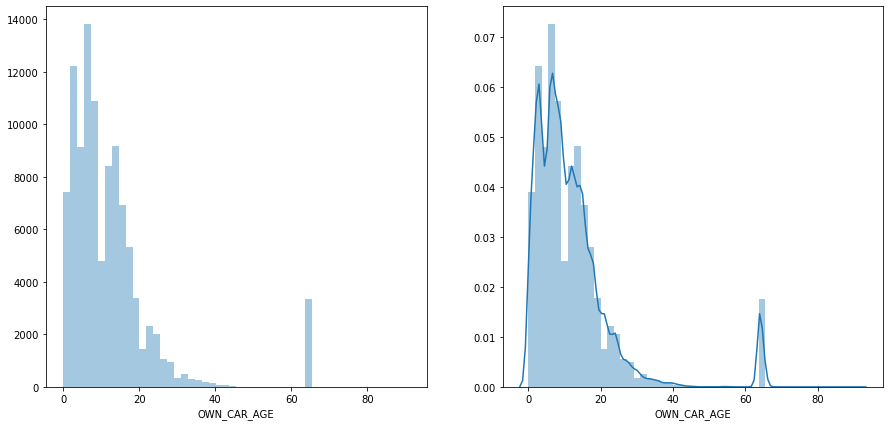

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.distplot(train1['OWN_CAR_AGE'].dropna(), norm_hist=False, kde=False)
plt.subplot(1,2,2)
sns.distplot(train1['OWN_CAR_AGE'].dropna(), norm_hist=False, kde=True)



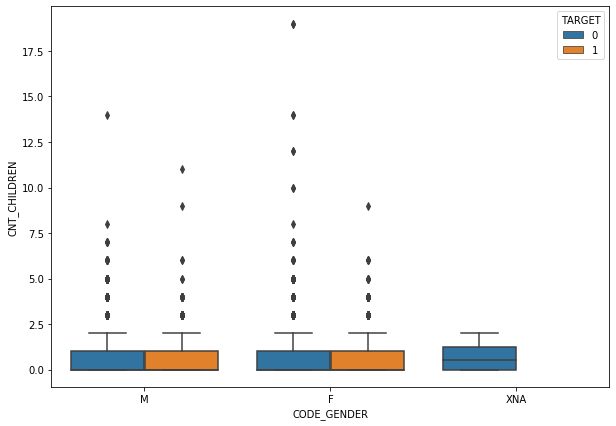

In [19]:
# what is the minumum number of children do clients have

fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x='CODE_GENDER', y='CNT_CHILDREN', hue='TARGET', data=train1)

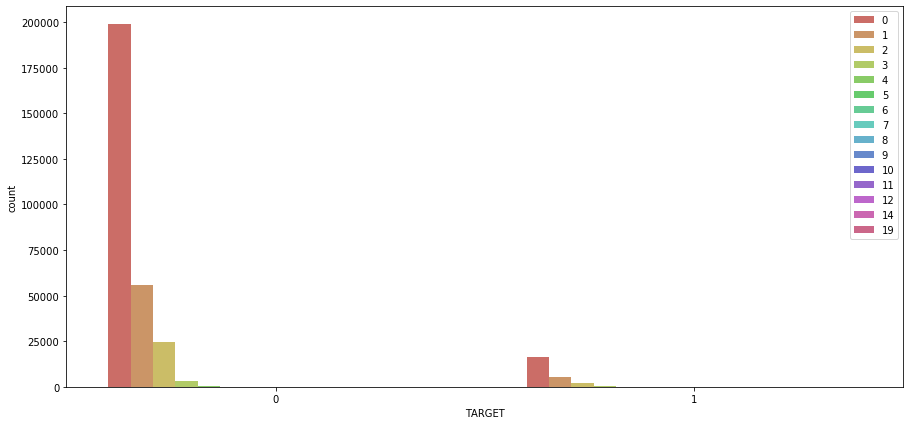

In [20]:
# do having a kid influence repayment

ax = plt.figure(figsize=(15, 7))
sns.countplot(x='TARGET', hue='CNT_CHILDREN', data=train1, palette='hls')
plt.legend(loc=1)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

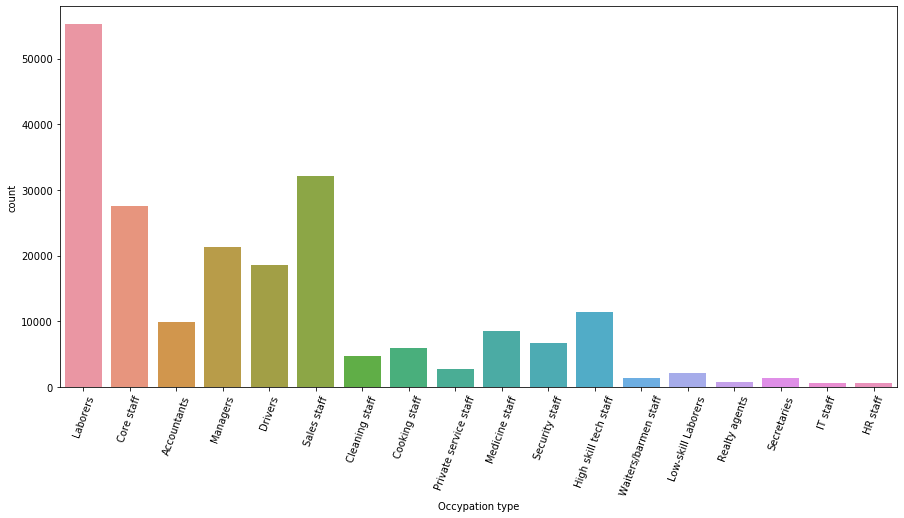

In [22]:
# occupation
# who are major borrowers, 
# what are their occupations
fig = plt.figure(figsize=(15, 7))
sns.countplot(x='OCCUPATION_TYPE', data=train1)
plt.xlabel('Occypation type')
plt.xticks(rotation=70)


Text(0, 0.5, 'average annual family income')

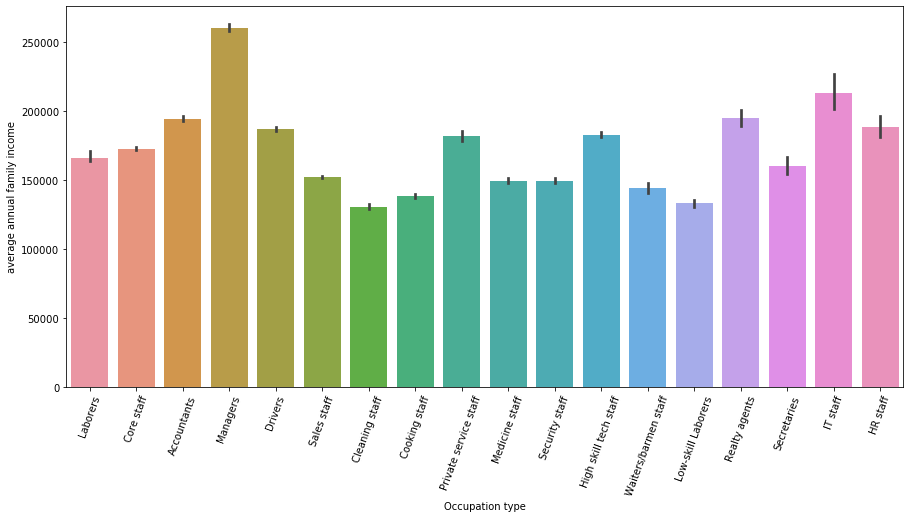

In [23]:
# how economically stable are clients, who are the most and least staff

fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', data=train1)
plt.xticks(rotation=70)
plt.xlabel('Occupation type')
plt.ylabel('average annual family income')


Text(0.5, 0, 'Occupation Tpye')

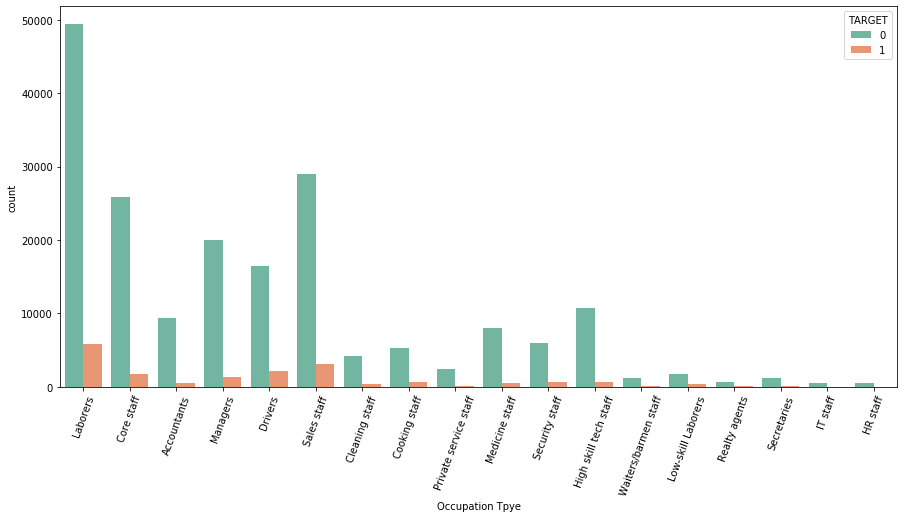

In [24]:
# which category of occpants repay on time
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=train1, palette='Set2')
plt.xticks(rotation=70)
plt.xlabel('Occupation Tpye')


In [25]:
train1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# get the number of people having occupation and target grouped

occupation_df = pd.DataFrame(data=train1.groupby(['OCCUPATION_TYPE',
                                                  'TARGET']).count()['SK_ID_CURR'])

In [27]:
occupation_df.reset_index(inplace=True)


In [28]:
occupation_df.head()

,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,0,9339
1,Accountants,1,474
2,Cleaning staff,0,4206
3,Cleaning staff,1,447
4,Cooking staff,0,5325


In [29]:
# get the number of people grouped on the type of occupation and target in array form

value_counts = occupation_df['SK_ID_CURR'].values

In [30]:
value_counts

array([ 9339,   474,  4206,   447,  5325,   621, 25832,  1738, 16496,
        2107,   527,    36, 10679,   701,   492,    34, 49348,  5838,
        1734,   359, 20043,  1328,  7965,   572,  2477,   175,   692,
          59, 29010,  3092,  1213,    92,  5999,   722,  1196,   152],
      dtype=int64)

In [34]:
value_counts

array([   34,    36,    59,    92,   152,   175,   359,   447,   474,
         492,   527,   572,   621,   692,   701,   722,  1196,  1213,
        1328,  1734,  1738,  2107,  2477,  3092,  4206,  5325,  5838,
        5999,  7965,  9339, 10679, 16496, 20043, 25832, 29010, 49348],
      dtype=int64)

In [35]:
def repayers_to_applicants_ratio(values):
    """
    FInds the ratio of Repayers to Applicants.
    This kind of is a measure for safety. Larger the value better the applicant
    values: array of entires whose counts are given returns the repayers to applicants ratio
    
    precondition: the counts are such that the targets alligned are in order 0 and 1
    """
    
    flag = 1
    ratios = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            ratios.append(current_number/(current_number + next_number))
            ratios.append(current_number/(current_number + next_number))
            
        flag = flag*-1
        
    return ratios


In [37]:
import time
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold


In [38]:
from contextlib import contextmanager

In [40]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))
    
#one-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


In [ ]:
# Preprocess application_train

def preprocess_application_data(num_rows=None, nan_as_category=False):
    # Read data and merge
    train_df =pd.read_csv('dataset/dataset/application_train.csv', nrows=num_rows)
    test_df = pd.read_csv('dataset/dataset/application_test.csv', nrows = num_rows)
    print(f"Train samples: {len(train_df)}, test samples: {len(test_df)}")
    
    df = df.append(test_df).reset_index()
    
    # categorical features with binary encode
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALITY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
        
        # categorical features with one hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)

        
    # NAN values for days_employed
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
    
    
    